In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import seaborn as sns

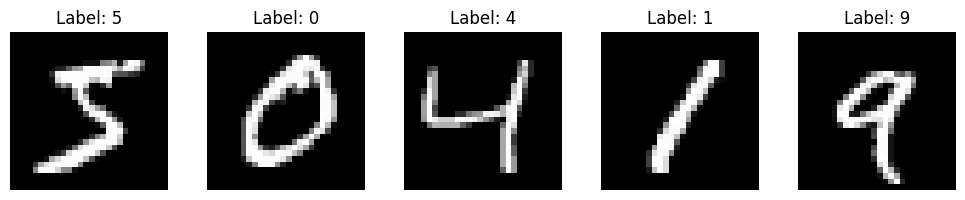

Dataset shape: (70000, 784)
Number of classes: 10
Class distribution sorted by label:
 class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


In [2]:
# 1. Data Loading
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Visualize 5 samples from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y.iloc[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Show analytical info about the dataset
print("Dataset shape:", X.shape)
print("Number of classes:", len(set(y)))
print("Class distribution sorted by label:\n", y.value_counts().sort_index())
# print("Class distribution:\n", y.value_counts())


In [3]:
# 2. Data Preprocessing
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Show analytical info about the processed dataset
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set class distribution:\n", y_train.value_counts().sort_index())
print("Test set class distribution:\n", y_test.value_counts().sort_index())

Training set shape: (56000, 784)
Test set shape: (14000, 784)
Training set class distribution:
 class
0    5560
1    6277
2    5610
3    5708
4    5529
5    5040
6    5480
7    5790
8    5468
9    5538
Name: count, dtype: int64
Test set class distribution:
 class
0    1343
1    1600
2    1380
3    1433
4    1295
5    1273
6    1396
7    1503
8    1357
9    1420
Name: count, dtype: int64


In [7]:
# 3. Model Training
# Initialize and train the classifier
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)


c:\Users\Fatema\workspace\masters\learning-analytics\assignment-3\code\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

In [8]:
# 4. Model Evaluation
# Predict on the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9155

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



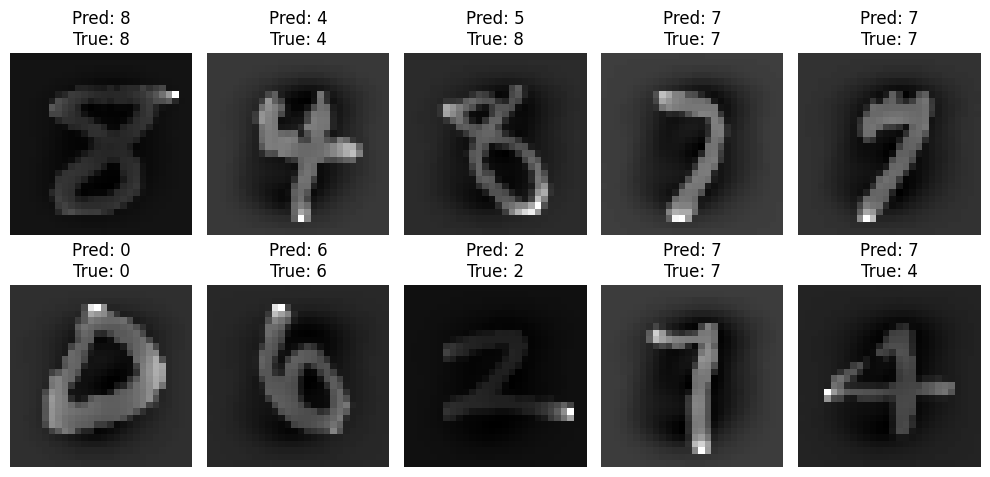

In [12]:
# Plot some sample results
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test.iloc[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


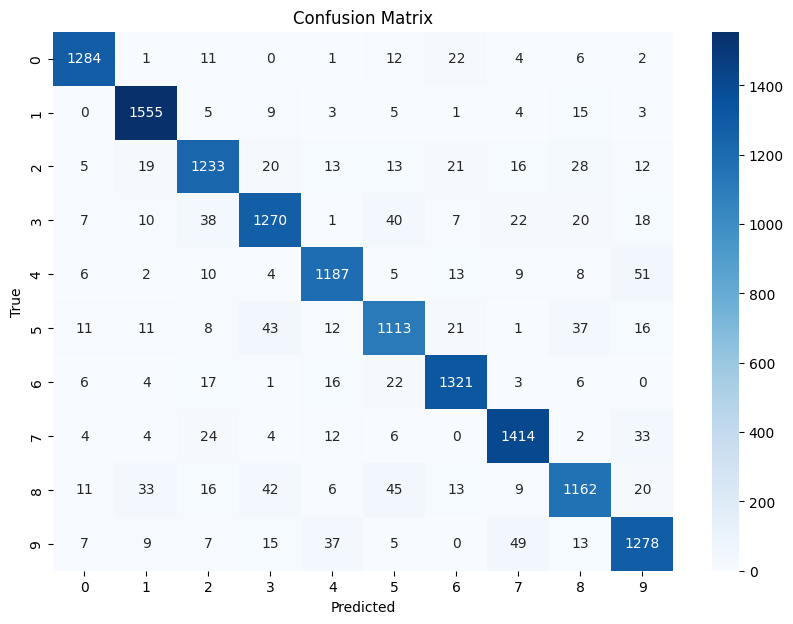

In [10]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()